In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/sample_data/UNSW_NB15_training-set.csv.zip")

In [3]:
df.head(20)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,254,0,1.803636e+08,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,254,0,8.810000e+08,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,254,0,8.544000e+08,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,254,0,6.000000e+08,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,254,0,8.504000e+08,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,254,0,1.045333e+09,0.0,0,0,0.003,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,392,0,0,0,2,2,2,2,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,254,0,1.306667e+09,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,980,0,0,0,2,2,2,2,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,254,0,1.977143e+08,0.0,0,0,0.028,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,692,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,0,0,0.000000e+00,0.0,0,0,60000.688,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,0,0,0.000000e+00,0.0,0,0,60000.712,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0


In [4]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [6]:
df.shape

(82332, 45)

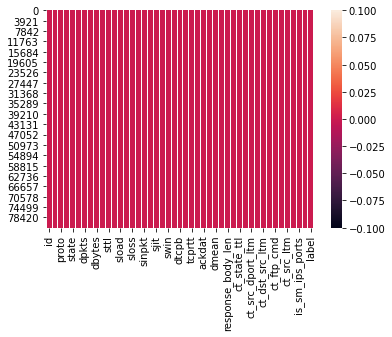

In [7]:
sns.heatmap(df.isnull())
plt.show()

In [8]:
print("# Number of attack category : ")
df.groupby("attack_cat").count()['id']


# Number of attack category : 


attack_cat
Analysis            677
Backdoor            583
DoS                4089
Exploits          11132
Fuzzers            6062
Generic           18871
Normal            37000
Reconnaissance     3496
Shellcode           378
Worms                44
Name: id, dtype: int64

Text(0.5, 1.0, 'Repartition of attack types')

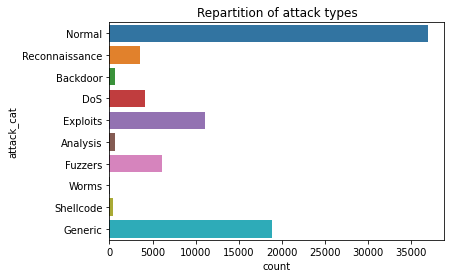

In [9]:
barplot = sns.countplot(data=df,y='attack_cat')
barplot.set_title('Repartition of attack types')

In [10]:
df["proto"].value_counts


<bound method IndexOpsMixin.value_counts of 0        udp
1        udp
2        udp
3        udp
4        udp
        ... 
82327    udp
82328    tcp
82329    arp
82330    arp
82331    udp
Name: proto, Length: 82332, dtype: object>

In [11]:
df["proto"].unique()

array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 <a list of 6 Text major ticklabel objects>)

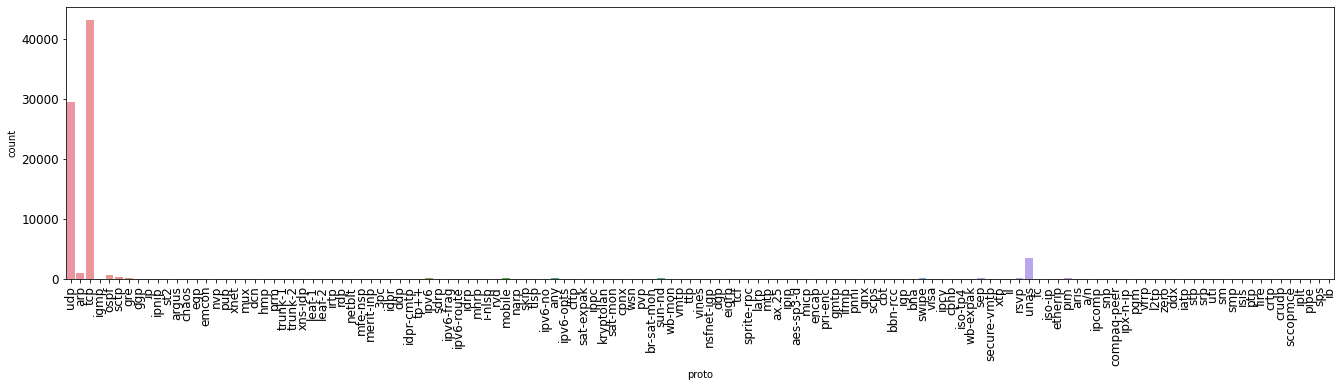

In [12]:
plt.subplots(figsize=(50,5))
plt.subplot(121)
sns.countplot(df.proto )
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

In [13]:
df["service"].value_counts()

-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

In [14]:
df["service"].unique

<bound method Series.unique of 0        -
1        -
2        -
3        -
4        -
        ..
82327    -
82328    -
82329    -
82330    -
82331    -
Name: service, Length: 82332, dtype: object>

Text(0.5, 1.0, 'Services')

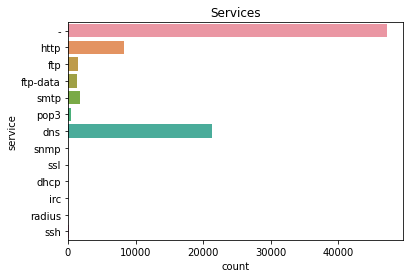

In [15]:
barplot = sns.countplot(data=df,y='service')
barplot.set_title('Services')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]), <a list of 10 Text major ticklabel objects>)

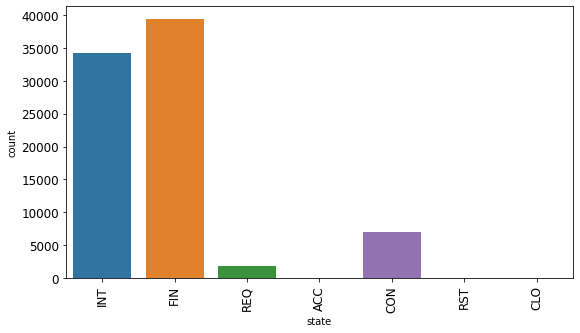

In [16]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.countplot(df.state )
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

In [17]:
df.corr()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
id,1.000000,0.016037,-0.020766,-0.037020,-0.005647,-0.031115,-0.121700,0.095939,0.306539,-0.003063,-0.106562,-0.006852,-0.033966,0.100814,0.048488,0.072775,0.021298,0.228434,0.143912,0.145089,0.185379,0.283052,0.259464,0.262394,0.092661,-0.102775,-0.023927,-0.022225,-0.261561,0.138739,-0.314142,-0.317444,-0.346396,-0.297913,-0.049584,-0.049279,0.035399,-0.345738,-0.275818,0.097736,-0.387489
dur,0.016037,1.000000,0.280239,0.217507,0.225432,0.172492,-0.118031,-0.000986,0.090048,-0.076343,-0.047032,0.240113,0.171182,0.079840,0.150801,0.146599,0.165418,0.083990,0.044482,0.045306,0.061186,0.075329,0.066530,0.073074,0.090527,0.043637,0.006017,0.076215,-0.088328,0.093925,-0.072591,-0.086880,-0.081637,-0.071127,0.015724,0.015547,0.018879,-0.080789,-0.091253,0.027472,-0.001145
spkts,-0.020766,0.280239,1.000000,0.369554,0.965750,0.198324,-0.068249,-0.092536,0.054601,-0.044194,0.074440,0.973644,0.198683,-0.014501,-0.003309,-0.002407,0.010481,0.111828,0.083647,0.086208,0.116206,0.009943,0.004203,0.015534,0.193038,0.140961,0.006767,0.085618,-0.058717,-0.073850,-0.047928,-0.053109,-0.055095,-0.061852,0.010361,0.010423,0.000443,-0.049367,-0.058815,-0.013960,-0.027731
dpkts,-0.037020,0.217507,0.369554,1.000000,0.175834,0.976419,-0.083173,-0.163830,0.036483,-0.054145,0.133835,0.189060,0.981506,-0.017141,-0.007181,-0.003862,0.034276,0.141478,0.110259,0.107270,0.147482,-0.007023,-0.010998,-0.000646,0.012490,0.395965,0.026651,0.358040,-0.062836,-0.122442,-0.052606,-0.062549,-0.067452,-0.075012,0.012473,0.012555,0.021041,-0.057374,-0.063169,-0.016103,-0.061515
sbytes,-0.005647,0.225432,0.965750,0.175834,1.000000,0.010036,-0.025102,-0.017866,0.049891,-0.015228,-0.006428,0.995027,0.007091,-0.005399,-0.001432,-0.002675,-0.003050,0.041450,0.028712,0.033089,0.043252,0.016774,0.010659,0.021615,0.206682,-0.003185,0.000271,0.001684,-0.030204,-0.007311,-0.022276,-0.020586,-0.020451,-0.024065,-0.002572,-0.002569,-0.004626,-0.021540,-0.030049,-0.004910,0.020641
dbytes,-0.031115,0.172492,0.198324,0.976419,0.010036,1.000000,-0.047978,-0.114537,0.012537,-0.031266,0.100923,0.014561,0.997109,-0.010201,-0.007266,-0.005182,0.029201,0.083015,0.064456,0.061270,0.086472,-0.012606,-0.014792,-0.007524,-0.030533,0.375397,0.028519,0.382727,-0.034330,-0.073023,-0.029569,-0.035335,-0.038965,-0.044048,-0.006521,-0.006498,0.022901,-0.033301,-0.034416,-0.009267,-0.032632
rate,-0.121700,-0.118031,-0.068249,-0.083173,-0.025102,-0.047978,1.000000,0.388155,-0.453913,0.550104,-0.138441,-0.040139,-0.062073,-0.065681,-0.052206,-0.061961,-0.081591,-0.534075,-0.428528,-0.426959,-0.553097,-0.267190,-0.228876,-0.268328,-0.109797,-0.259278,-0.096055,-0.023166,0.367670,0.399469,0.310987,0.345573,0.366238,0.358902,-0.050093,-0.049952,-0.112432,0.327563,0.370816,-0.058689,0.328629
sttl,0.095939,-0.000986,-0.092536,-0.163830,-0.017866,-0.114537,0.388155,1.000000,-0.033338,0.252901,-0.386224,-0.038088,-0.137737,-0.179270,-0.006154,0.030062,-0.084072,-0.370458,-0.305700,-0.304837,-0.398368,-0.017990,-0.018886,-0.013597,0.001120,-0.531972,-0.124303,-0.054898,0.311509,0.556059,0.220689,0.287568,0.315776,0.335118,-0.089618,-0.089897,-0.174840,0.236869,0.304131,-0.187933,0.504159
dttl,0.306539,0.090048,0.054601,0.036483,0.049891,0.012537,-0.453913,-0.033338,1.000000,-0.293939,-0.139491,0.061249,0.021966,-0.075620,0.090734,0.140634,0.113799,0.749894,0.609751,0.608659,0.781991,0.643854,0.550758,0.647588,0.168427,0.108273,0.162919,0.005350,-0.444748,-0.230182,-0.376921,-0.349865,-0.357793,-0.364181,0.052195,0.050854,0.208628,-0.403289,-0.454576,-0.087019,-0.098591
sload,-0.003063,-0.076343,-0.044194,-0.054145,-0.015228,-0.031266,0.550104,0.252901,-0.293939,

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

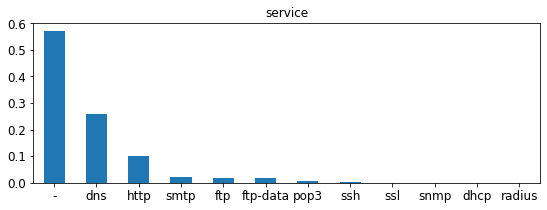

In [18]:
plt.subplots(figsize=(20,10))
plt.subplot(321)
df.service.value_counts(100)[:12].plot(kind='bar', title="service", fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)


In [19]:
df_num=df.select_dtypes(["float64","int64"])
df_cat=df.select_dtypes("object")


In [20]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    #create object of LabelEncoder
    le=LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])
#check
df_cat.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,proto,service,state,attack_cat
0,117,0,4,6
1,117,0,4,6
2,117,0,4,6
3,117,0,4,6
4,117,0,4,6


In [21]:
df_new = pd.concat([df_num,df_cat],axis=1)
df_new.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto,service,state,attack_cat
0,1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,117,0,4,6
1,2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,117,0,4,6
2,3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0,117,0,4,6
3,4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0,117,0,4,6
4,5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0,117,0,4,6


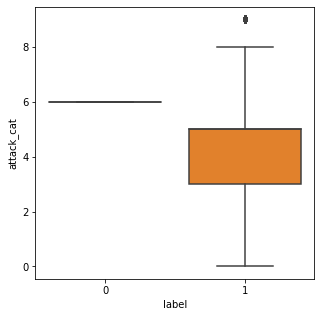

In [22]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df_new,y="attack_cat",x="label")
plt.show()

Hear we can see theair is some outlier 

In [23]:
df_new[df_new["attack_cat"]>8]

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto,service,state,attack_cat
387,388,0.201833,10,6,1308,268,74.318869,254,252,4.669207e+04,8.878628e+03,2,1,20.555000,37.485000,1029.959401,56.742820,255,2213049113,3720986296,255,0.059694,0.014399,0.045295,131,45,1,0,1,1,1,1,1,1,0,0,1,1,2,0,1,111,5,3,9
821,822,4.235010,46,236,2314,308456,66.351671,254,252,4.276731e+03,5.802092e+05,2,116,94.089292,17.785219,4511.060777,2129.541450,255,3840933853,1541394341,255,0.206742,0.108835,0.097907,50,1307,1,149237,1,1,1,1,1,1,0,0,1,1,1,0,1,111,5,3,9
1111,1112,0.196822,10,6,1022,268,76.210992,254,252,3.739419e+04,9.104673e+03,2,1,20.148333,36.926398,1068.815062,61.553535,255,2705486571,623528626,255,0.064706,0.012189,0.052517,102,45,1,0,1,1,1,1,1,1,0,0,1,1,1,0,1,111,5,3,9
1586,1587,1.260943,10,6,1282,268,11.895858,254,252,7.321504e+03,1.421159e+03,2,1,138.352778,245.242000,9637.030379,450.915937,255,560953154,4194638564,255,0.098667,0.034732,0.063935,128,45,1,0,4,1,1,1,1,1,0,0,1,1,1,0,1,111,5,3,9
2853,2854,0.000005,2,0,92,0,200000.005100,254,0,7.360000e+07,0.000000e+00,0,0,0.005000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,19,1,0,1,117,0,4,9
3662,3663,0.678688,10,6,1306,268,22.101467,254,252,1.386204e+04,2.640389e+03,2,1,71.071667,114.114398,3585.672173,175.462531,255,94971482,1211350451,255,0.187901,0.108110,0.079791,131,45,1,0,1,1,1,1,1,1,0,0,1,2,1,0,1,111,5,3,9
4262,4263,0.000006,2,0,2050,0,166666.660800,254,0,1.366667e+09,0.000000e+00,0,0,0.006000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1025,0,0,0,1,2,1,1,1,1,0,0,0,1,1,0,1,117,0,4,9
5297,5298,0.928794,10,6,1302,268,16.149975,254,252,1.009481e+04,1.929384e+03,2,1,96.318667,157.907406,5106.424147,254.466859,255,1102451960,1730706679,255,0.239367,0.139249,0.100118,130,45,1,0,1,1,1,1,1,1,0,0,1,1,1,0,1,111,5,3,9
6303,6304,0.226263,10,6,1302,268,66.294533,254,252,4.143850e+04,7.919987e+03,2,1,23.494667,42.942801,1241.200823,68.334430,255,701662753,752664488,255,0.058136,0.011539,0.046597,130,45,1,0,1,1,1,1,1,1,0,0,1,1,2,0,1,111,5,3,9
6481,6482,0.390372,14,6,8682,268,48.671523,254,252,1.652168e+05,4.590493e+03,4,1,24.145231,70.977797,1517.354638,95.391852,255,2048442348,1642264782,255,0.072417,0.035482,0.036935,620,45,1,0,1,1,1,1,1,1,0,0,1,1,1,0,1,111,5,3,9


In [24]:
df_new.drop([387,821,1111,1586,2853,3662,4262,5297,6303,6481,6667,7207,8496,8792,8852,8890,9003,10689,11471,11515,43984,44486,44896,45794,47087,47340,47427,48587,49587,49541,50086,50679,51485,51827,51979,52259,53379,54965,55336,59795,60346,62856,63429,63663,63891],inplace=True)

so hear we can see out lier is removed

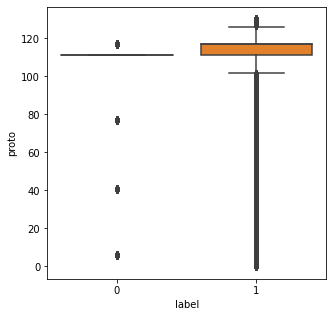

In [25]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df_new,y="proto",x="label")
plt.show()

In [63]:
df_new[df_new["proto"]>120]

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto,service,state,attack_cat
0,1,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,117,0,4,6
1,2,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,117,0,4,6
2,3,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0,117,0,4,6
3,4,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0,117,0,4,6
4,5,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0,117,0,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82325,82326,0.000010,2,0,104,0,100000.002500,254,0,4.160000e+07,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,117,0,4,6
82326,82327,0.000009,2,0,104,0,111111.107200,254,0,4.622222e+07,0.000000,0,0,0.009000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,1,1,1,1,0,0,0,1,1,0,0,117,0,4,6
82327,82328,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,0,117,0,4,6
82328,82329,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,0,111,0,3,6


In [62]:
df_new.drop([770,799,801,808,61217,61320,61323,61329,6133],inplace=True)

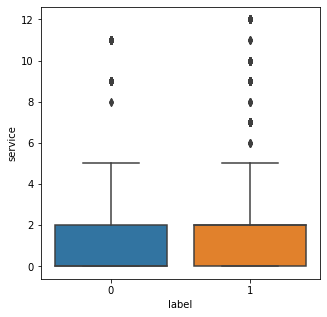

In [28]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df_new,y="service",x="label")
plt.show()

In [29]:
df_new[df_new["service"]>6]

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto,service,state,attack_cat
300,301,0.894891,20,20,3178,1784,43.580725,62,252,2.699770e+04,1.515268e+04,7,8,47.099528,46.271000,2223.784116,51.086562,255,2200114777,3402592518,255,0.062427,0.014980,0.047447,159,89,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,111,9,3,3
301,302,0.998863,20,24,948,9872,43.048947,62,252,7.216205e+03,7.577416e+04,7,10,52.571738,41.461650,2778.532203,2506.784107,255,43493637,2610778474,255,0.115983,0.044489,0.071494,47,411,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,111,7,3,3
303,304,9.957550,246,1554,10662,2055289,180.666930,62,252,8.531416e+03,1.650179e+06,7,775,40.643060,6.410746,2217.616259,868.071675,255,2055688489,4288220471,255,0.059617,0.013861,0.045756,43,1323,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,111,7,3,3
304,305,1.232252,20,20,950,2266,31.649370,62,252,5.862437e+03,1.397766e+04,7,8,64.855367,61.430262,3167.501337,71.707625,255,1661865435,99458549,255,0.104512,0.041314,0.063198,48,113,0,0,2,1,1,2,1,1,0,0,0,2,1,0,1,111,7,3,3
331,332,2.838932,26,64,1222,63172,31.349817,62,252,3.311104e+03,1.752349e+05,7,30,113.551523,43.740096,6166.704590,3738.317491,255,724680820,4013307900,255,0.151464,0.083303,0.068161,47,987,0,0,1,1,2,1,1,2,0,0,0,2,1,0,1,111,7,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63130,63131,1.901135,118,36,130606,2512,80.478242,62,252,5.449376e+05,1.028017e+04,55,8,16.249017,53.775855,1753.156801,103.408445,255,2650978111,1396266537,255,0.041114,0.007877,0.033237,1107,70,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,111,9,3,3
63225,63226,1.572897,22,20,4172,1820,26.066552,62,252,2.025816e+04,8.793965e+03,8,8,74.899855,79.851523,3860.389583,95.456391,255,2693623976,3729420649,255,0.117769,0.054988,0.062781,190,91,0,0,1,1,1,1,1,1,0,0,0,4,1,0,1,111,9,3,3
63349,63350,1.572172,24,22,4323,1822,28.622822,62,252,2.108166e+04,8.853993e+03,9,8,68.355304,72.226953,3814.129725,100.339039,255,25289680,523298753,255,0.072624,0.037031,0.035593,180,83,0,0,1,1,3,1,1,3,0,0,0,3,1,0,1,111,9,3,3
67415,67416,7.826361,8,0,3808,0,0.894413,254,0,3.405925e+03,0.000000e+00,0,0,1118.051625,0.000000,1319.097125,0.000000,0,0,0,0,0.000000,0.000000,0.000000,476,0,0,0,1,2,1,1,1,1,0,0,0,1,1,0,0,117,8,4,6


In [30]:
df_new.drop([300,301,303,304,331,63130,63225,63349,67415,67415,68134],inplace=True)

we remove some out liers and  doing various modeling

In [31]:
X=df_new.drop("label",axis=1) #input features
Y=df_new["label"]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [33]:
def create_model(model):
    model.fit(X_train,Y_train)#we train the model
    y_pred=model.predict(X_test) #test
    print(classification_report(Y_test,y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_test,y_pred))
    return model


# LogisticRegression

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [35]:
from sklearn.linear_model import LogisticRegression  

In [36]:
lr=LogisticRegression()

In [37]:
create_model(lr)

              precision    recall  f1-score   support

           0       0.67      0.87      0.76     11013
           1       0.86      0.66      0.74     13668

    accuracy                           0.75     24681
   macro avg       0.77      0.76      0.75     24681
weighted avg       0.78      0.75      0.75     24681

Confusion Matrix : 
[[9557 1456]
 [4706 8962]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# BaggingClassifier

In [38]:
from sklearn.ensemble import BaggingClassifier 

In [39]:
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=780,random_state=1)

In [40]:
X_train.shape

(57587, 44)

In [41]:
create_model(bc)

              precision    recall  f1-score   support

           0       0.67      0.89      0.76     11013
           1       0.88      0.65      0.75     13668

    accuracy                           0.76     24681
   macro avg       0.77      0.77      0.76     24681
weighted avg       0.79      0.76      0.75     24681

Confusion Matrix : 
[[9757 1256]
 [4766 8902]]


BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=780, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=1, ve

# LinearSVC

In [42]:
#use SVM : support vector machine :
from sklearn.svm import LinearSVC

In [43]:
svc=LinearSVC(random_state=1)


In [44]:
create_model(svc)

              precision    recall  f1-score   support

           0       0.60      0.59      0.59     11013
           1       0.67      0.68      0.67     13668

    accuracy                           0.64     24681
   macro avg       0.63      0.63      0.63     24681
weighted avg       0.64      0.64      0.64     24681

Confusion Matrix : 
[[6443 4570]
 [4384 9284]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

# AdaBoostClassifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [46]:
ada=AdaBoostClassifier(n_estimators=50) 

In [47]:
create_model(ada)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11013
           1       1.00      1.00      1.00     13668

    accuracy                           1.00     24681
   macro avg       1.00      1.00      1.00     24681
weighted avg       1.00      1.00      1.00     24681

Confusion Matrix : 
[[11013     0]
 [    0 13668]]


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

# DecisionTreeClassifier

In [48]:
from sklearn.tree import DecisionTreeClassifier 

In [49]:
#create the object of DecisionTreeClassifier class
dt=DecisionTreeClassifier() 

In [50]:
#call function to train and test the model
dt=create_model(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11013
           1       1.00      1.00      1.00     13668

    accuracy                           1.00     24681
   macro avg       1.00      1.00      1.00     24681
weighted avg       1.00      1.00      1.00     24681

Confusion Matrix : 
[[11013     0]
 [    0 13668]]


In [51]:

dt.feature_importances_ 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [52]:
X.columns

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto', 'service',
       'state', 'attack_cat'],
      dtype='object')

In [53]:
#visualise the tree 
from sklearn import tree

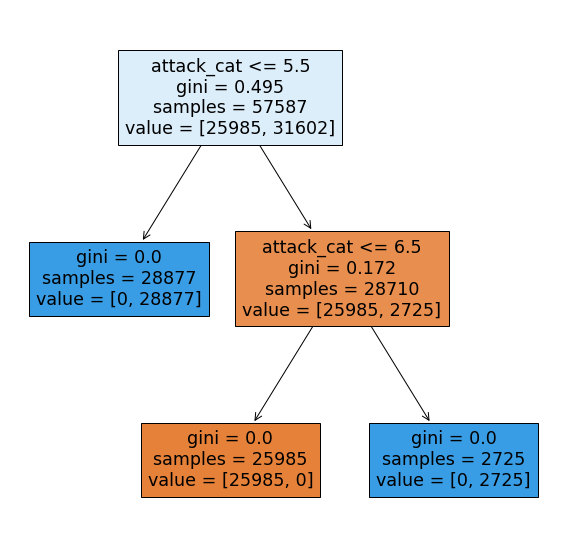

In [54]:
features=X.columns #features user defined list object which hold all input
fig=plt.figure(figsize=(10,10))
_=tree.plot_tree(dt,feature_names=features,filled=True)